In [1]:
#必要なライブラリのインポート
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#乱数の固定
np.random.seed(42)

In [3]:
#カルマンフィルタ
def karmann_filter(A, B, C, sigma_v, sigma_w, u, y, xhat, P):
    
    xhat_m = np.dot(A, xhat) #事前状態推定値
    P_m = np.dot(A, np.dot(P, A.T)) + np.dot(B, (sigma_v * B.T)) #事前誤差共分散行列
    G = np.dot(P_m, C) / (np.dot(C.T, np.dot(P_m, C)) + sigma_w) #カルマンゲイン
    xhat_n = xhat_m + np.dot(G, y - np.dot(C.T, xhat_m)) #状態推定値
    P_n = np.dot(np.eye(len(A)) - np.dot(G, C.T), P_m) #事後誤差共分散行列
    
    return xhat_n, P_n

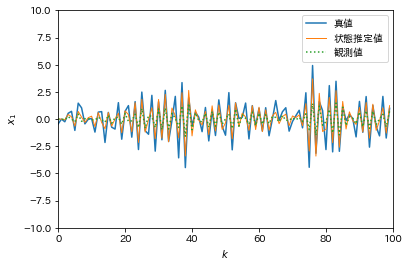

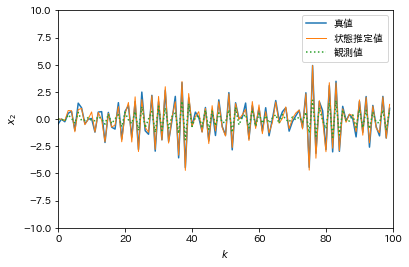

In [4]:
#問題設定
A = np.array([[0, -0.7], [1, -1.5]])
B = np.array([[0.5], [1]])
C = np.array([[0], [1]])

N = 100 #データ数

sigma_v = 0.1 #システム雑音分散
sigma_w = 1.0 #観測雑音分散

v = np.random.randn(N, 1) * np.sqrt(1.0) #システム雑音
w = np.random.randn(N, 1) * np.sqrt(0.1) #観測雑音


#状態空間モデルを用いた時系列データの生成
x = np.zeros((N, 2))
y = np.zeros((N, 1))

y[0] = np.dot(C.T, x[0].T) + w[0]

for i in range(2, N):
    x[i] = (np.dot(A, x[i-1].T) + np.dot(B, v[i-1])).reshape(-1, 2)
    y[i] = np.dot(C.T, x[i].T) + w[i]
    
    
#カルマンフィルタによる推定
#推定値記憶領域の確保
xhat = np.zeros((N, 2))

#初期値設定
ganma = 1.0
P = ganma * np.eye(2)
xhat[0] = np.array([0, 0])

for i in range(2, N):
    xhat[i], P = karmann_filter(A, B, C, sigma_v, sigma_w, 0, y[i], xhat[i-1], P)
    
    
plt.figure(figsize = (6, 4))
plt.plot(range(N), y, '-', markersize=1)
plt.plot(range(N), x[:,0], linewidth=1)
plt.plot(range(N), xhat[:, 0], ':')
plt.xlim([0,N])
plt.ylim([-10,10])
plt.xlabel('$k$')
plt.ylabel('$x_1$')
plt.legend(['真値', '状態推定値', '観測値'])

plt.figure(figsize = (6, 4))
plt.plot(range(N), y, '-', markersize = 1)
plt.plot(range(N), x[:, 1], linewidth= 1)
plt.plot(range(N), xhat[:, 1], ':')
plt.xlim([0,N])
plt.ylim([-10, 10])
plt.xlabel('$k$')
plt.ylabel('$x_2$')
plt.legend(['真値', '状態推定値', '観測値'])

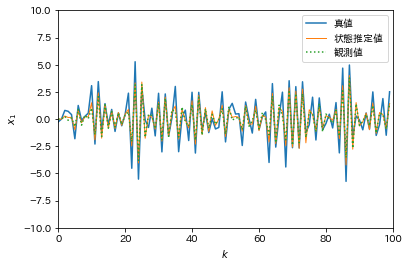

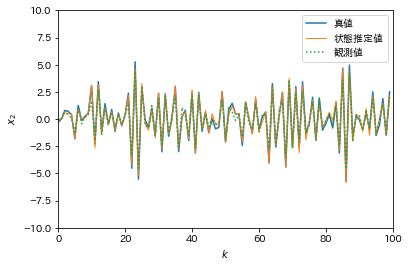

In [5]:
#問題設定
A = np.array([[0, -0.7], [1, -1.5]])
B = np.array([[0.5], [1]])
C = np.array([[0], [1]])

N = 100 #データ数

sigma_v = 0.1 #システム雑音分散
sigma_w = 0.1 #観測雑音分散

v = np.random.randn(N, 1) * np.sqrt(1.0) #システム雑音
w = np.random.randn(N, 1) * np.sqrt(0.1) #観測雑音


#状態空間モデルを用いた時系列データの生成
x = np.zeros((N, 2))
y = np.zeros((N, 1))

y[0] = np.dot(C.T, x[0].T) + w[0]

for i in range(2, N):
    x[i] = (np.dot(A, x[i-1].T) + np.dot(B, v[i-1])).reshape(-1, 2)
    y[i] = np.dot(C.T, x[i].T) + w[i]
    
    
#カルマンフィルタによる推定
#推定値記憶領域の確保
xhat = np.zeros((N, 2))

#初期値設定
ganma = 1.0
P = ganma * np.eye(2)
xhat[0] = np.array([0, 0])

for i in range(2, N):
    xhat[i], P = karmann_filter(A, B, C, sigma_v, sigma_w, 0, y[i], xhat[i-1], P)
    
    
plt.figure(figsize = (6, 4))
plt.plot(range(N), y, '-', markersize=1)
plt.plot(range(N), x[:,0], linewidth=1)
plt.plot(range(N), xhat[:, 0], ':')
plt.xlim([0,N])
plt.ylim([-10,10])
plt.xlabel('$k$')
plt.ylabel('$x_1$')
plt.legend(['真値', '状態推定値', '観測値'])

plt.figure(figsize = (6, 4))
plt.plot(range(N), y, '-', markersize = 1)
plt.plot(range(N), x[:, 1], linewidth= 1)
plt.plot(range(N), xhat[:, 1], ':')
plt.xlim([0,N])
plt.ylim([-10, 10])
plt.xlabel('$k$')
plt.ylabel('$x_2$')
plt.legend(['真値', '状態推定値', '観測値'])

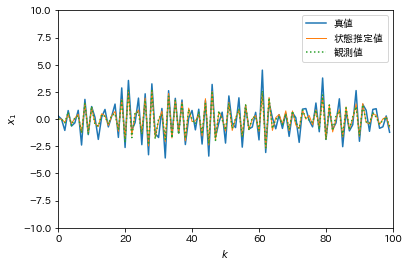

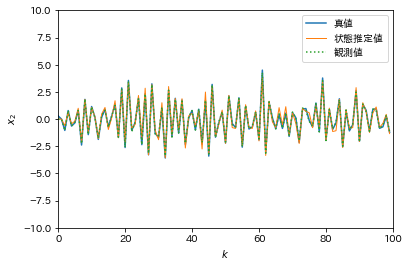

In [6]:
#問題設定
A = np.array([[0, -0.7], [1, -1.5]])
B = np.array([[0.5], [1]])
C = np.array([[0], [1]])

N = 100 #データ数

sigma_v = 0.1 #システム雑音分散
sigma_w = 0.01 #観測雑音分散

v = np.random.randn(N, 1) * np.sqrt(1.0) #システム雑音
w = np.random.randn(N, 1) * np.sqrt(0.1) #観測雑音


#状態空間モデルを用いた時系列データの生成
x = np.zeros((N, 2))
y = np.zeros((N, 1))

y[0] = np.dot(C.T, x[0].T) + w[0]

for i in range(2, N):
    x[i] = (np.dot(A, x[i-1].T) + np.dot(B, v[i-1])).reshape(-1, 2)
    y[i] = np.dot(C.T, x[i].T) + w[i]
    
    
#カルマンフィルタによる推定
#推定値記憶領域の確保
xhat = np.zeros((N, 2))

#初期値設定
ganma = 1.0
P = ganma * np.eye(2)
xhat[0] = np.array([0, 0])

for i in range(2, N):
    xhat[i], P = karmann_filter(A, B, C, sigma_v, sigma_w, 0, y[i], xhat[i-1], P)
    
    
plt.figure(figsize = (6, 4))
plt.plot(range(N), y, '-', markersize=1)
plt.plot(range(N), x[:,0], linewidth=1)
plt.plot(range(N), xhat[:, 0], ':')
plt.xlim([0,N])
plt.ylim([-10,10])
plt.xlabel('$k$')
plt.ylabel('$x_1$')
plt.legend(['真値', '状態推定値', '観測値'])

plt.figure(figsize = (6, 4))
plt.plot(range(N), y, '-', markersize = 1)
plt.plot(range(N), x[:, 1], linewidth= 1)
plt.plot(range(N), xhat[:, 1], ':')
plt.xlim([0,N])
plt.ylim([-10, 10])
plt.xlabel('$k$')
plt.ylabel('$x_2$')
plt.legend(['真値', '状態推定値', '観測値'])

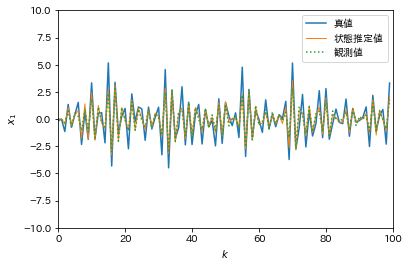

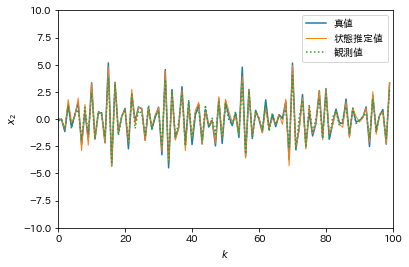

In [7]:
#問題設定
A = np.array([[0, -0.7], [1, -1.5]])
B = np.array([[0.5], [1]])
C = np.array([[0], [1]])

N = 100 #データ数

sigma_v = 1.0 #システム雑音分散
sigma_w = 1.0 #観測雑音分散

v = np.random.randn(N, 1) * np.sqrt(1.0) #システム雑音
w = np.random.randn(N, 1) * np.sqrt(0.1) #観測雑音


#状態空間モデルを用いた時系列データの生成
x = np.zeros((N, 2))
y = np.zeros((N, 1))

y[0] = np.dot(C.T, x[0].T) + w[0]

for i in range(2, N):
    x[i] = (np.dot(A, x[i-1].T) + np.dot(B, v[i-1])).reshape(-1, 2)
    y[i] = np.dot(C.T, x[i].T) + w[i]
    
    
#カルマンフィルタによる推定
#推定値記憶領域の確保
xhat = np.zeros((N, 2))

#初期値設定
ganma = 1.0
P = ganma * np.eye(2)
xhat[0] = np.array([0, 0])

for i in range(2, N):
    xhat[i], P = karmann_filter(A, B, C, sigma_v, sigma_w, 0, y[i], xhat[i-1], P)
    
    
plt.figure(figsize = (6, 4))
plt.plot(range(N), y, '-', markersize=1)
plt.plot(range(N), x[:,0], linewidth=1)
plt.plot(range(N), xhat[:, 0], ':')
plt.xlim([0,N])
plt.ylim([-10,10])
plt.xlabel('$k$')
plt.ylabel('$x_1$')
plt.legend(['真値', '状態推定値', '観測値'])

plt.figure(figsize = (6, 4))
plt.plot(range(N), y, '-', markersize = 1)
plt.plot(range(N), x[:, 1], linewidth= 1)
plt.plot(range(N), xhat[:, 1], ':')
plt.xlim([0,N])
plt.ylim([-10, 10])
plt.xlabel('$k$')
plt.ylabel('$x_2$')
plt.legend(['真値', '状態推定値', '観測値'])

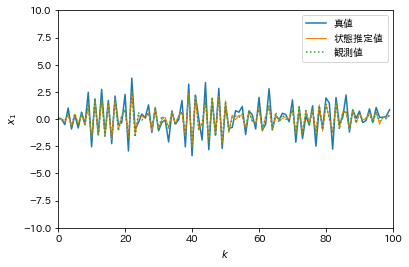

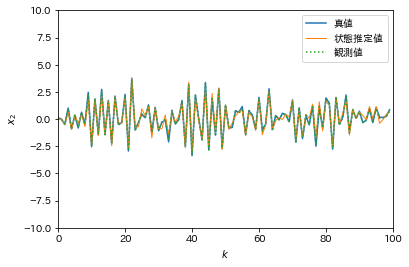

In [8]:
#問題設定
A = np.array([[0, -0.7], [1, -1.5]])
B = np.array([[0.5], [1]])
C = np.array([[0], [1]])

N = 100 #データ数

sigma_v = 1.0 #システム雑音分散
sigma_w = 0.1 #観測雑音分散

v = np.random.randn(N, 1) * np.sqrt(1.0) #システム雑音
w = np.random.randn(N, 1) * np.sqrt(0.1) #観測雑音


#状態空間モデルを用いた時系列データの生成
x = np.zeros((N, 2))
y = np.zeros((N, 1))

y[0] = np.dot(C.T, x[0].T) + w[0]

for i in range(2, N):
    x[i] = (np.dot(A, x[i-1].T) + np.dot(B, v[i-1])).reshape(-1, 2)
    y[i] = np.dot(C.T, x[i].T) + w[i]
    
    
#カルマンフィルタによる推定
#推定値記憶領域の確保
xhat = np.zeros((N, 2))

#初期値設定
ganma = 1.0
P = ganma * np.eye(2)
xhat[0] = np.array([0, 0])

for i in range(2, N):
    xhat[i], P = karmann_filter(A, B, C, sigma_v, sigma_w, 0, y[i], xhat[i-1], P)
    
    
plt.figure(figsize = (6, 4))
plt.plot(range(N), y, '-', markersize=1)
plt.plot(range(N), x[:,0], linewidth=1)
plt.plot(range(N), xhat[:, 0], ':')
plt.xlim([0,N])
plt.ylim([-10,10])
plt.xlabel('$k$')
plt.ylabel('$x_1$')
plt.legend(['真値', '状態推定値', '観測値'])

plt.figure(figsize = (6, 4))
plt.plot(range(N), y, '-', markersize = 1)
plt.plot(range(N), x[:, 1], linewidth= 1)
plt.plot(range(N), xhat[:, 1], ':')
plt.xlim([0,N])
plt.ylim([-10, 10])
plt.xlabel('$k$')
plt.ylabel('$x_2$')
plt.legend(['真値', '状態推定値', '観測値'])

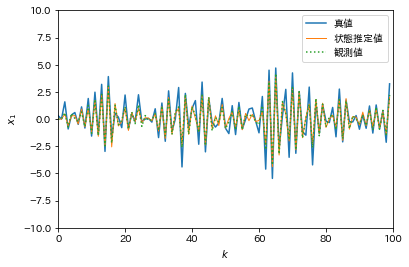

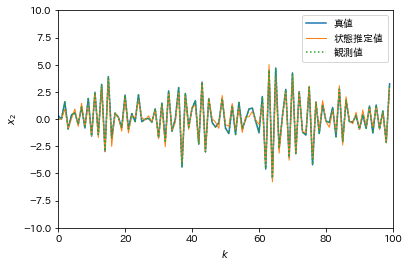

In [9]:
#問題設定
A = np.array([[0, -0.7], [1, -1.5]])
B = np.array([[0.5], [1]])
C = np.array([[0], [1]])

N = 100 #データ数

sigma_v = 1.0 #システム雑音分散
sigma_w = 0.01 #観測雑音分散

v = np.random.randn(N, 1) * np.sqrt(1.0) #システム雑音
w = np.random.randn(N, 1) * np.sqrt(0.1) #観測雑音


#状態空間モデルを用いた時系列データの生成
x = np.zeros((N, 2))
y = np.zeros((N, 1))

y[0] = np.dot(C.T, x[0].T) + w[0]

for i in range(2, N):
    x[i] = (np.dot(A, x[i-1].T) + np.dot(B, v[i-1])).reshape(-1, 2)
    y[i] = np.dot(C.T, x[i].T) + w[i]
    
    
#カルマンフィルタによる推定
#推定値記憶領域の確保
xhat = np.zeros((N, 2))

#初期値設定
ganma = 1.0
P = ganma * np.eye(2)
xhat[0] = np.array([0, 0])

for i in range(2, N):
    xhat[i], P = karmann_filter(A, B, C, sigma_v, sigma_w, 0, y[i], xhat[i-1], P)
    
    
plt.figure(figsize = (6, 4))
plt.plot(range(N), y, '-', markersize=1)
plt.plot(range(N), x[:,0], linewidth=1)
plt.plot(range(N), xhat[:, 0], ':')
plt.xlim([0,N])
plt.ylim([-10,10])
plt.xlabel('$k$')
plt.ylabel('$x_1$')
plt.legend(['真値', '状態推定値', '観測値'])

plt.figure(figsize = (6, 4))
plt.plot(range(N), y, '-', markersize = 1)
plt.plot(range(N), x[:, 1], linewidth= 1)
plt.plot(range(N), xhat[:, 1], ':')
plt.xlim([0,N])
plt.ylim([-10, 10])
plt.xlabel('$k$')
plt.ylabel('$x_2$')
plt.legend(['真値', '状態推定値', '観測値'])

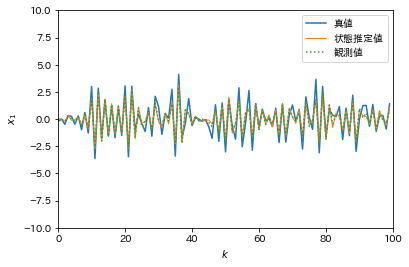

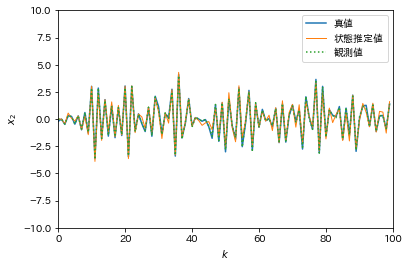

In [10]:
#問題設定
A = np.array([[0, -0.7], [1, -1.5]])
B = np.array([[0.5], [1]])
C = np.array([[0], [1]])

N = 100 #データ数

sigma_v = 10.0 #システム雑音分散
sigma_w = 1.0 #観測雑音分散

v = np.random.randn(N, 1) * np.sqrt(1.0) #システム雑音
w = np.random.randn(N, 1) * np.sqrt(0.1) #観測雑音


#状態空間モデルを用いた時系列データの生成
x = np.zeros((N, 2))
y = np.zeros((N, 1))

y[0] = np.dot(C.T, x[0].T) + w[0]

for i in range(2, N):
    x[i] = (np.dot(A, x[i-1].T) + np.dot(B, v[i-1])).reshape(-1, 2)
    y[i] = np.dot(C.T, x[i].T) + w[i]
    
    
#カルマンフィルタによる推定
#推定値記憶領域の確保
xhat = np.zeros((N, 2))

#初期値設定
ganma = 1.0
P = ganma * np.eye(2)
xhat[0] = np.array([0, 0])

for i in range(2, N):
    xhat[i], P = karmann_filter(A, B, C, sigma_v, sigma_w, 0, y[i], xhat[i-1], P)
    
    
plt.figure(figsize = (6, 4))
plt.plot(range(N), y, '-', markersize=1)
plt.plot(range(N), x[:,0], linewidth=1)
plt.plot(range(N), xhat[:, 0], ':')
plt.xlim([0,N])
plt.ylim([-10,10])
plt.xlabel('$k$')
plt.ylabel('$x_1$')
plt.legend(['真値', '状態推定値', '観測値'])

plt.figure(figsize = (6, 4))
plt.plot(range(N), y, '-', markersize = 1)
plt.plot(range(N), x[:, 1], linewidth= 1)
plt.plot(range(N), xhat[:, 1], ':')
plt.xlim([0,N])
plt.ylim([-10, 10])
plt.xlabel('$k$')
plt.ylabel('$x_2$')
plt.legend(['真値', '状態推定値', '観測値'])

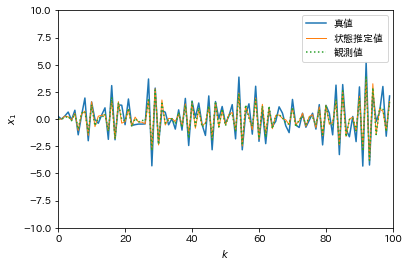

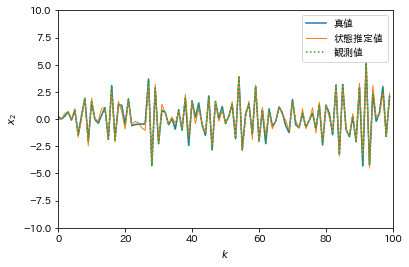

In [11]:
#問題設定
A = np.array([[0, -0.7], [1, -1.5]])
B = np.array([[0.5], [1]])
C = np.array([[0], [1]])

N = 100 #データ数

sigma_v = 10.0 #システム雑音分散
sigma_w = 0.1 #観測雑音分散

v = np.random.randn(N, 1) * np.sqrt(1.0) #システム雑音
w = np.random.randn(N, 1) * np.sqrt(0.1) #観測雑音


#状態空間モデルを用いた時系列データの生成
x = np.zeros((N, 2))
y = np.zeros((N, 1))

y[0] = np.dot(C.T, x[0].T) + w[0]

for i in range(2, N):
    x[i] = (np.dot(A, x[i-1].T) + np.dot(B, v[i-1])).reshape(-1, 2)
    y[i] = np.dot(C.T, x[i].T) + w[i]
    
    
#カルマンフィルタによる推定
#推定値記憶領域の確保
xhat = np.zeros((N, 2))

#初期値設定
ganma = 1.0
P = ganma * np.eye(2)
xhat[0] = np.array([0, 0])

for i in range(2, N):
    xhat[i], P = karmann_filter(A, B, C, sigma_v, sigma_w, 0, y[i], xhat[i-1], P)
    
    
plt.figure(figsize = (6, 4))
plt.plot(range(N), y, '-', markersize=1)
plt.plot(range(N), x[:,0], linewidth=1)
plt.plot(range(N), xhat[:, 0], ':')
plt.xlim([0,N])
plt.ylim([-10,10])
plt.xlabel('$k$')
plt.ylabel('$x_1$')
plt.legend(['真値', '状態推定値', '観測値'])

plt.figure(figsize = (6, 4))
plt.plot(range(N), y, '-', markersize = 1)
plt.plot(range(N), x[:, 1], linewidth= 1)
plt.plot(range(N), xhat[:, 1], ':')
plt.xlim([0,N])
plt.ylim([-10, 10])
plt.xlabel('$k$')
plt.ylabel('$x_2$')
plt.legend(['真値', '状態推定値', '観測値'])

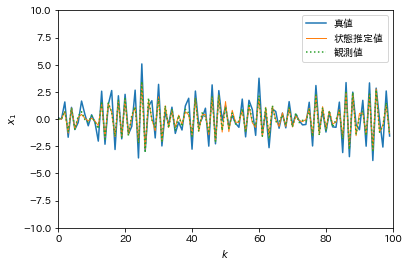

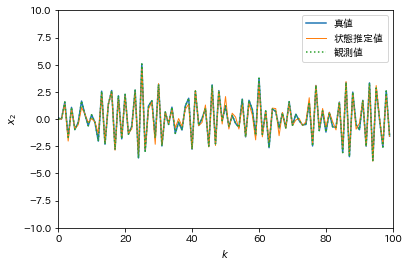

In [12]:
#問題設定
A = np.array([[0, -0.7], [1, -1.5]])
B = np.array([[0.5], [1]])
C = np.array([[0], [1]])

N = 100 #データ数

sigma_v = 10.0 #システム雑音分散
sigma_w = 0.01 #観測雑音分散

v = np.random.randn(N, 1) * np.sqrt(1.0) #システム雑音
w = np.random.randn(N, 1) * np.sqrt(0.1) #観測雑音


#状態空間モデルを用いた時系列データの生成
x = np.zeros((N, 2))
y = np.zeros((N, 1))

y[0] = np.dot(C.T, x[0].T) + w[0]

for i in range(2, N):
    x[i] = (np.dot(A, x[i-1].T) + np.dot(B, v[i-1])).reshape(-1, 2)
    y[i] = np.dot(C.T, x[i].T) + w[i]
    
    
#カルマンフィルタによる推定
#推定値記憶領域の確保
xhat = np.zeros((N, 2))

#初期値設定
ganma = 1.0
P = ganma * np.eye(2)
xhat[0] = np.array([0, 0])

for i in range(2, N):
    xhat[i], P = karmann_filter(A, B, C, sigma_v, sigma_w, 0, y[i], xhat[i-1], P)
    
    
plt.figure(figsize = (6, 4))
plt.plot(range(N), y, '-', markersize=1)
plt.plot(range(N), x[:,0], linewidth=1)
plt.plot(range(N), xhat[:, 0], ':')
plt.xlim([0,N])
plt.ylim([-10,10])
plt.xlabel('$k$')
plt.ylabel('$x_1$')
plt.legend(['真値', '状態推定値', '観測値'])

plt.figure(figsize = (6, 4))
plt.plot(range(N), y, '-', markersize = 1)
plt.plot(range(N), x[:, 1], linewidth= 1)
plt.plot(range(N), xhat[:, 1], ':')
plt.xlim([0,N])
plt.ylim([-10, 10])
plt.xlabel('$k$')
plt.ylabel('$x_2$')
plt.legend(['真値', '状態推定値', '観測値'])